In [1]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\alber\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [2]:
string = tf.Variable("string", tf.string)
print(string)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'string'>


In [5]:
tensor1 = tf.ones([1,2,3])
print(tensor1)
tensor2 = tf.reshape(tensor1, [2,3,1])
print(tensor2)
tensor3 = tf.reshape(tensor2, [3, -1])
print(tensor3)


tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [8]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [13]:
print(dftrain)

        sex   age  n_siblings_spouses  parch     fare   class     deck  \
0      male  22.0                   1      0   7.2500   Third  unknown   
1    female  38.0                   1      0  71.2833   First        C   
2    female  26.0                   0      0   7.9250   Third  unknown   
3    female  35.0                   1      0  53.1000   First        C   
4      male  28.0                   0      0   8.4583   Third  unknown   
..      ...   ...                 ...    ...      ...     ...      ...   
622    male  28.0                   0      0  10.5000  Second  unknown   
623    male  25.0                   0      0   7.0500   Third  unknown   
624  female  19.0                   0      0  30.0000   First        B   
625  female  28.0                   1      2  23.4500   Third  unknown   
626    male  32.0                   0      0   7.7500   Third  unknown   

     embark_town alone  
0    Southampton     n  
1      Cherbourg     n  
2    Southampton     y  
3    Southa

Text(0.5, 0, '% survive')

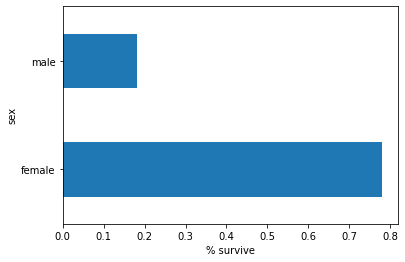

In [14]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [20]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    voca = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, voca))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

for col in feature_columns:
    print(col)

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_va

TypeError: list indices must be integers or slices, not str